In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from itertools import combinations

In [2]:
# Import the Wine quality.csv dataset.
wine = pd.read_csv("C:\\Users\\tianj\\LSE Machine Learning\\Module 2\\Wine quality.csv")
wine.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,wine
0,6.2,0.28,0.33,1.7,0.029,24.0,111.0,0.99000,3.24,0.50,12.1,6,white
1,6.2,0.33,0.19,5.6,0.042,22.0,143.0,0.99425,3.15,0.63,9.9,5,white
2,7.0,0.32,0.24,6.2,0.048,31.0,228.0,0.99570,3.23,0.62,9.4,6,white
3,10.4,0.64,0.24,2.8,0.105,29.0,53.0,0.99980,3.24,0.67,9.9,5,red
4,6.2,0.28,0.27,10.3,0.030,26.0,108.0,0.99388,3.20,0.36,10.7,6,white


In [3]:
white = wine[wine["wine"] == "white"][["fixed.acidity", "pH"]]
red = wine[wine["wine"] == "red"][["fixed.acidity", "pH"]]

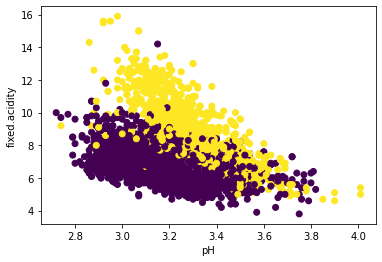

In [4]:
plt.scatter(x="pH", y="fixed.acidity", data=wine, c=wine["wine"]=="red")
plt.ylabel("fixed.acidity")
plt.xlabel("pH")
plt.show()

In [5]:
[train, test] = train_test_split(wine, train_size=0.85, test_size=0.15)

X_train, y_train = train.iloc[:, :train.shape[1]-1].values, train["wine"]
X_test, y_test = test.iloc[:, :test.shape[1]-1].values, test["wine"]

In [6]:
LR_1 = LogisticRegression(penalty="l1", solver="saga", max_iter=10000)  # LASSO regularization
LR_2 = LogisticRegression(penalty="l2", max_iter=10000)  # Ridge regularization
LR_elasticnet = LogisticRegression(penalty="elasticnet", solver="saga", l1_ratio=0.66, max_iter=10000) # Elastic regularization
LR_none = LogisticRegression(penalty="none", max_iter=10000) # Wihthout regularization

In [7]:
LR_1.fit(X=X_train, y=y_train) # LASSO regularization
LR_2.fit(X=X_train, y=y_train) # Ridge regularization
LR_elasticnet.fit(X=X_train, y=y_train) # Elastic regularization
LR_none.fit(X=X_train, y=y_train) # Wihthout regularization

LogisticRegression(max_iter=10000, penalty='none')

In [8]:
predict_1 = LR_1.predict(X_test)
predict_2 = LR_2.predict(X_test)
predict_elasticnet = LR_elasticnet.predict(X_test)
predict_none= LR_none.predict(X_test)

In [9]:
result_1 = sum(predict_1 == y_test) / len(y_test)
result_2 = sum(predict_2 == y_test) / len(y_test)
result_elasticnet = sum(predict_elasticnet == y_test) / len(y_test)
result_none = sum(predict_none == y_test) / len(y_test)

In [10]:
pd.Series({"LASSO": result_1, "Ridge": result_2, "Elastic": result_elasticnet, "None": result_none})

LASSO      0.972308
Ridge      0.985641
Elastic    0.972308
None       0.988718
dtype: float64

In [11]:
result = dict()
for r in range(1, 13):
    for comb in combinations(wine.columns[: -1], r):
        X_train, y_train = train[list(comb)].iloc[:, :train.shape[1]-1].values, train["wine"]
        X_test, y_test = test[list(comb)].iloc[:, :test.shape[1]-1].values, test["wine"]
        LR_grid_search = LogisticRegression(penalty="none", max_iter=1000000).fit(X=X_train, y=y_train)
        predict = LR_grid_search.predict(X_test)
        precision = sum(predict == y_test) / len(y_test)
        if precision >= 0.99:
            print(comb, precision)
            result[comb] = precision

('citric.acid', 'residual.sugar', 'chlorides', 'total.sulfur.dioxide', 'density') 0.9907692307692307
('citric.acid', 'residual.sugar', 'total.sulfur.dioxide', 'density', 'sulphates') 0.9907692307692307
('citric.acid', 'residual.sugar', 'total.sulfur.dioxide', 'density', 'alcohol') 0.9917948717948718
('residual.sugar', 'chlorides', 'total.sulfur.dioxide', 'density', 'sulphates') 0.9907692307692307
('residual.sugar', 'chlorides', 'total.sulfur.dioxide', 'density', 'alcohol') 0.9907692307692307
('residual.sugar', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'alcohol') 0.9907692307692307
('residual.sugar', 'total.sulfur.dioxide', 'density', 'pH', 'alcohol') 0.9907692307692307
('residual.sugar', 'total.sulfur.dioxide', 'density', 'alcohol', 'quality') 0.9907692307692307
('fixed.acidity', 'volatile.acidity', 'residual.sugar', 'total.sulfur.dioxide', 'density', 'alcohol') 0.9917948717948718
('fixed.acidity', 'citric.acid', 'residual.sugar', 'chlorides', 'total.sulfur.dioxide', 'd

('fixed.acidity', 'residual.sugar', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'pH', 'alcohol') 0.9938461538461538
('fixed.acidity', 'residual.sugar', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'sulphates', 'alcohol') 0.9938461538461538
('fixed.acidity', 'residual.sugar', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'alcohol', 'quality') 0.9938461538461538
('fixed.acidity', 'residual.sugar', 'total.sulfur.dioxide', 'density', 'pH', 'alcohol', 'quality') 0.9917948717948718
('fixed.acidity', 'residual.sugar', 'total.sulfur.dioxide', 'density', 'sulphates', 'alcohol', 'quality') 0.9928205128205129
('volatile.acidity', 'citric.acid', 'residual.sugar', 'chlorides', 'free.sulfur.dioxide', 'density', 'alcohol') 0.9907692307692307
('volatile.acidity', 'citric.acid', 'residual.sugar', 'chlorides', 'total.sulfur.dioxide', 'density', 'sulphates') 0.9917948717948718
('volatile.acidity', 'citric.acid', 'residual.sugar', 'chlorides', 'total.sulfur.dioxide',

('fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar', 'total.sulfur.dioxide', 'density', 'sulphates', 'alcohol') 0.9928205128205129
('fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar', 'total.sulfur.dioxide', 'density', 'sulphates', 'quality') 0.9917948717948718
('fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar', 'density', 'pH', 'alcohol', 'quality') 0.9917948717948718
('fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar', 'density', 'sulphates', 'alcohol', 'quality') 0.9907692307692307
('fixed.acidity', 'volatile.acidity', 'residual.sugar', 'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'sulphates') 0.9907692307692307
('fixed.acidity', 'volatile.acidity', 'residual.sugar', 'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'alcohol') 0.9907692307692307
('fixed.acidity', 'volatile.acidity', 'residual.sugar', 'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'pH',

('volatile.acidity', 'residual.sugar', 'chlorides', 'total.sulfur.dioxide', 'density', 'pH', 'alcohol', 'quality') 0.9928205128205129
('volatile.acidity', 'residual.sugar', 'chlorides', 'total.sulfur.dioxide', 'density', 'sulphates', 'alcohol', 'quality') 0.9938461538461538
('volatile.acidity', 'residual.sugar', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol') 0.9917948717948718
('volatile.acidity', 'residual.sugar', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'pH', 'alcohol', 'quality') 0.9907692307692307
('volatile.acidity', 'residual.sugar', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'sulphates', 'alcohol', 'quality') 0.9938461538461538
('volatile.acidity', 'residual.sugar', 'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality') 0.9928205128205129
('citric.acid', 'residual.sugar', 'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'pH', 'sulphates') 0.9928205128205129
('citri

('fixed.acidity', 'citric.acid', 'residual.sugar', 'chlorides', 'density', 'pH', 'sulphates', 'alcohol', 'quality') 0.9907692307692307
('fixed.acidity', 'citric.acid', 'residual.sugar', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'quality') 0.9907692307692307
('fixed.acidity', 'citric.acid', 'residual.sugar', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'sulphates', 'alcohol', 'quality') 0.9948717948717949
('fixed.acidity', 'citric.acid', 'residual.sugar', 'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality') 0.9958974358974358
('fixed.acidity', 'residual.sugar', 'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'quality') 0.9917948717948718
('fixed.acidity', 'residual.sugar', 'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'pH', 'alcohol', 'quality') 0.9948717948717949
('fixed.acidity', 'residual.sugar', 'chlorides', 'free.sulfur.dioxide', 'total.sulfur.di

('fixed.acidity', 'citric.acid', 'residual.sugar', 'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'pH', 'alcohol', 'quality') 0.9948717948717949
('fixed.acidity', 'citric.acid', 'residual.sugar', 'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'sulphates', 'alcohol', 'quality') 0.9948717948717949
('fixed.acidity', 'citric.acid', 'residual.sugar', 'chlorides', 'free.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality') 0.9917948717948718
('fixed.acidity', 'citric.acid', 'residual.sugar', 'chlorides', 'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality') 0.9958974358974358
('fixed.acidity', 'citric.acid', 'residual.sugar', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality') 0.9948717948717949
('volatile.acidity', 'citric.acid', 'residual.sugar', 'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol') 0.993846153846

In [20]:
max(result)

('volatile.acidity',
 'residual.sugar',
 'total.sulfur.dioxide',
 'density',
 'sulphates',
 'quality')

In [22]:
max(result.values())

0.9958974358974358

In [47]:
result = pd.Series(result)
result.sort_values(ascending=False).index[0]

('fixed.acidity',
 'citric.acid',
 'residual.sugar',
 'total.sulfur.dioxide',
 'density')